### Importar Bibliotecas

In [244]:
import pandas as pd
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier



[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


### Importar o Dataset

In [245]:
## Importar o dataset
df = pd.read_csv('../input/data-nlp/nlp.csv')

## Pré-Processamento para Texto

### Pré-Processamento - Regex

In [246]:
# Para esses dois processamentos de letra minuscula com a regex dá para fazer uma função

def remover_texto(dataframe, coluna):
    
  dataframe['tweet_modificado'] = dataframe[coluna].str.lower()
  dataframe['tweet_modificado'] = dataframe[coluna].apply(lambda x :re.sub(r"[',]"," ",x))
  df = dataframe['tweet_modificado'] = dataframe[coluna].apply(lambda x :re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?","",x))
  return df

In [247]:
remover_texto(df,'tweet')

0        studiolife aislife requires passion dedication...
1         white supremacists want everyone to see the n...
2        safe ways to heal your acne    altwaystoheal h...
3        is the hp and the cursed child book up for res...
4          3rd bihday to my amazing hilarious nephew el...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like a mermaid  hairflip neverready fo...
17194    hillary campaigned today in ohioomg amp used w...
17195    happy at work conference right mindset leads t...
17196    my   song so glad free download  shoegaze newm...
Name: tweet, Length: 17197, dtype: object

### Pré-Processamento - Stopwords

In [248]:
new_stopwords = list(stopwords.words('english'))
new_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Pré-Processamento - Tokenização

In [249]:
def tokenize(text):
  tokenizacao = TreebankWordTokenizer().tokenize(text)
  
  return ' '.join([w.lower() for w in tokenizacao if w not in list(new_stopwords)])

In [250]:
df['tweet_modificado'] = df['tweet_modificado'].apply(lambda x: tokenize(x))

### Pré-Processamento - TF-IDF

In [251]:
vectorizacao = TfidfVectorizer(preprocessor = tokenize,stop_words = new_stopwords,ngram_range = (1,2),
                               max_df = 0.9,min_df = 0.01,lowercase = True,analyzer = 'word')

In [252]:
fitar = vectorizacao.fit_transform(df['tweet_modificado']).toarray()
print(fitar)


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.43916052 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.83564722 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [253]:
print(vectorizacao.get_feature_names())

['affirmation', 'always', 'amp', 'back', 'beautiful', 'best', 'bihday', 'blog', 'cant', 'cute', 'day', 'days', 'dont', 'even', 'family', 'fathers', 'fathers day', 'fathersday', 'feel', 'finally', 'first', 'friday', 'friends', 'fun', 'get', 'girl', 'go', 'going', 'good', 'got', 'great', 'happiness', 'happy', 'healthy', 'home', 'im', 'know', 'life', 'like', 'live', 'love', 'love take', 'make', 'makes', 'model', 'model love', 'morning', 'much', 'music', 'need', 'never', 'new', 'next', 'one', 'orlando', 'people', 'positive', 'positive affirmation', 'really', 'right', 'sad', 'see', 'smile', 'still', 'summer', 'sunday', 'take', 'take time', 'thankful', 'thankful positive', 'thanks', 'think', 'time', 'time ur', 'today', 'tomorrow', 'trump', 'ur', 'us', 'via', 'wait', 'want', 'way', 'week', 'weekend', 'work', 'world']


### Clusterização para a criação da variável Target - Transformação de um modelo não supervisionado para supervisionado

In [254]:
def cluster(data,coluna1,coluna2):
    for cluster in range(0,15):
        filtro = data[data[coluna2] == cluster]
        listar = filtro[coluna1].tolist()
        concatenar = ' '.join(listar)
        plt.figure(figsize=(20,20))
        plt.imshow(WordCloud().generate(concatenar))
        

In [257]:
df.head()

id                                              tweet     nome  \
0  31963  #studiolife #aislife #requires #passion #dedic...    alice   
1  31964  @user #white #supremacists want everyone to se...    bruno   
2  31965  safe ways to heal your #acne!!    #altwaystohe...      bia   
3  31966  is the hp and the cursed child book up for res...    edgar   
4  31967    3rd #bihday to my amazing, hilarious #nephew...  rodolfo   

                                    tweet_modificado  
0  studiolife aislife requires passion dedication...  
1  white supremacists want everyone see new birds...  
2  safe ways heal acne altwaystoheal healthy healing  
3  hp cursed child book reservations already yes ...  
4  3rd bihday amazing hilarious nephew eli ahmir ...

In [262]:
# Criando uma coluna de clusters e adicionando no dataframe e renomeando a coluna 
cluster_dataframe = pd.DataFrame(clusters)
df_c = pd.concat([df,cluster_dataframe.reset_index(drop=True)], axis=1)
df_c.rename(columns={0: "clusters"},inplace = True)          

In [263]:
clusters = MiniBatchKMeans(n_clusters=16, init_size=1024, batch_size=2048, random_state=20).fit_predict(fitar)


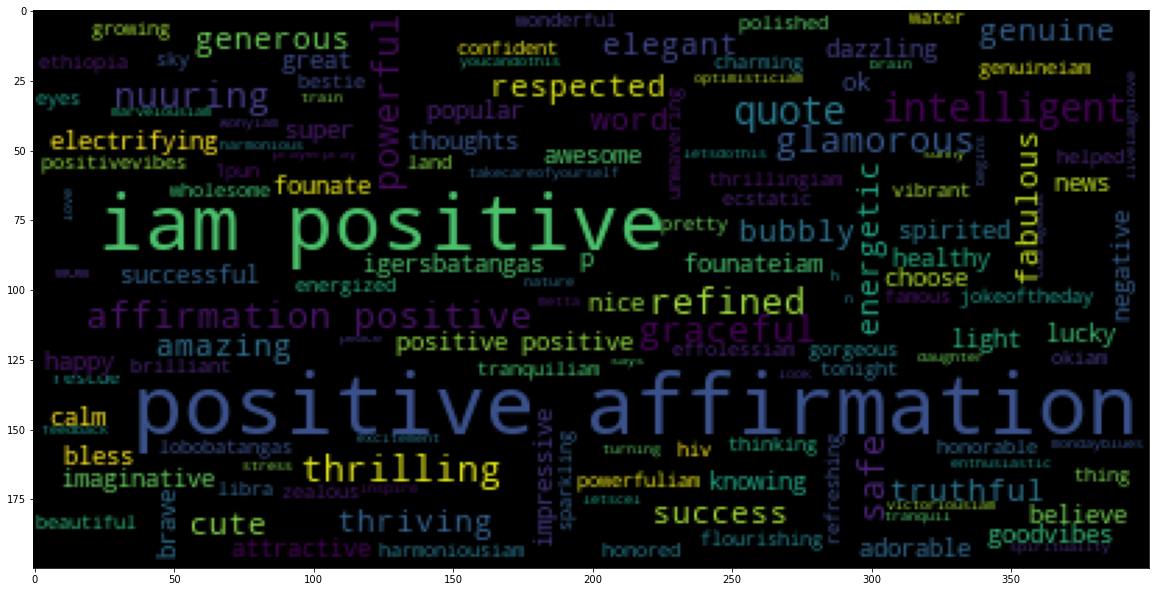

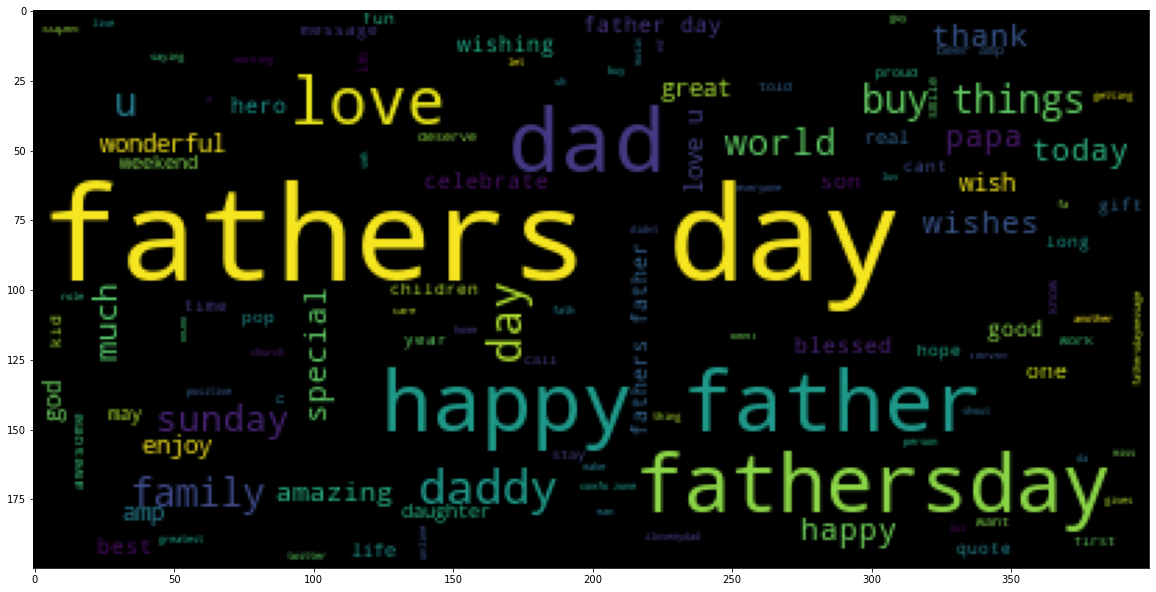

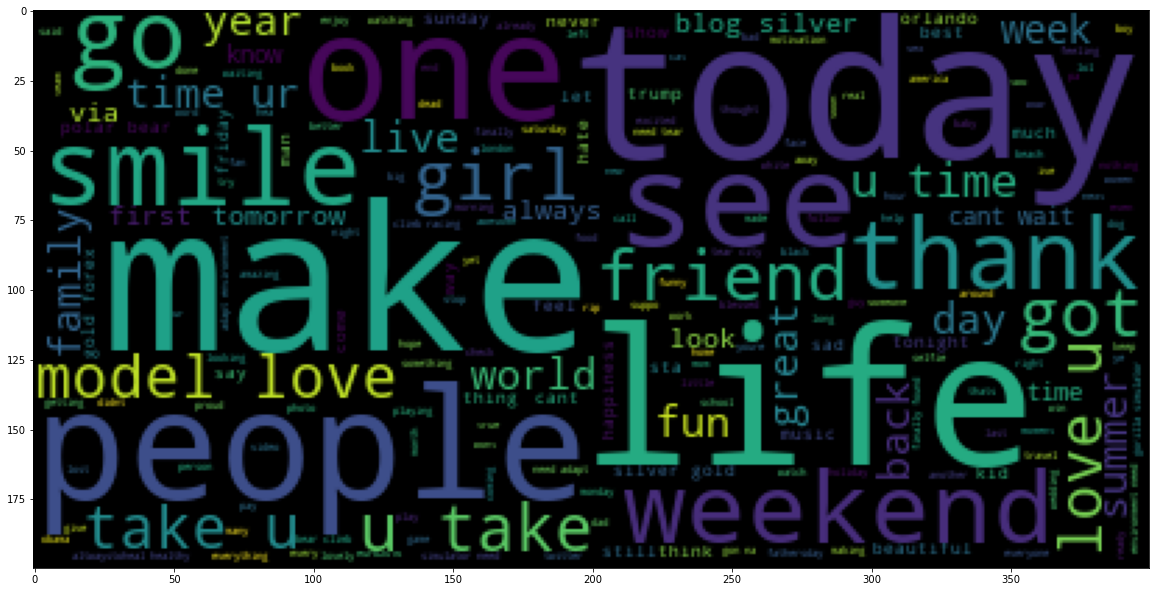

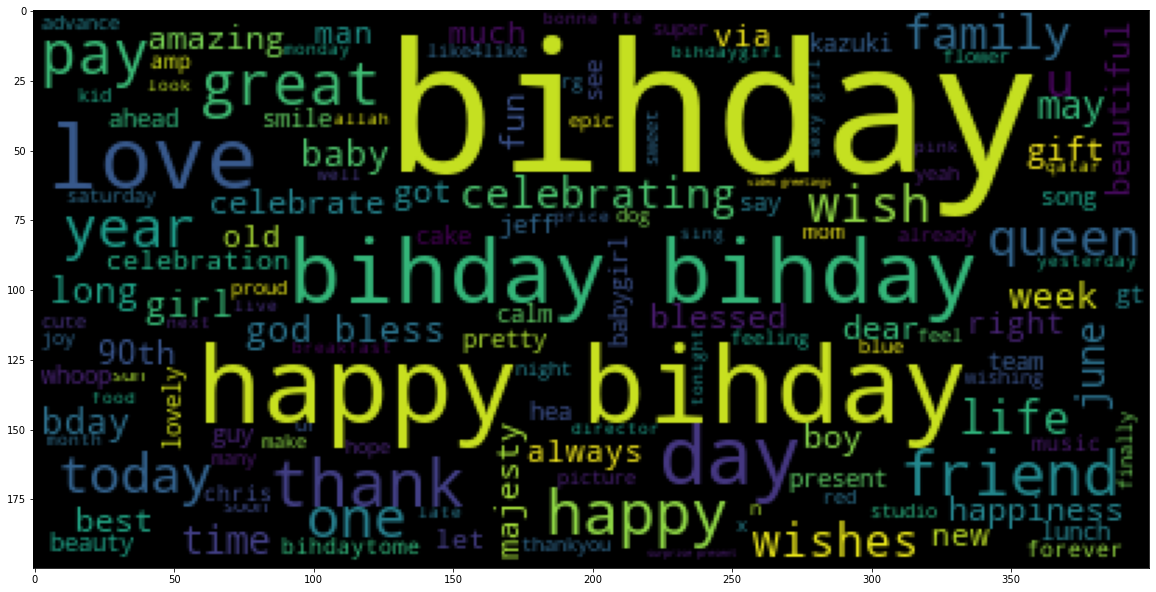

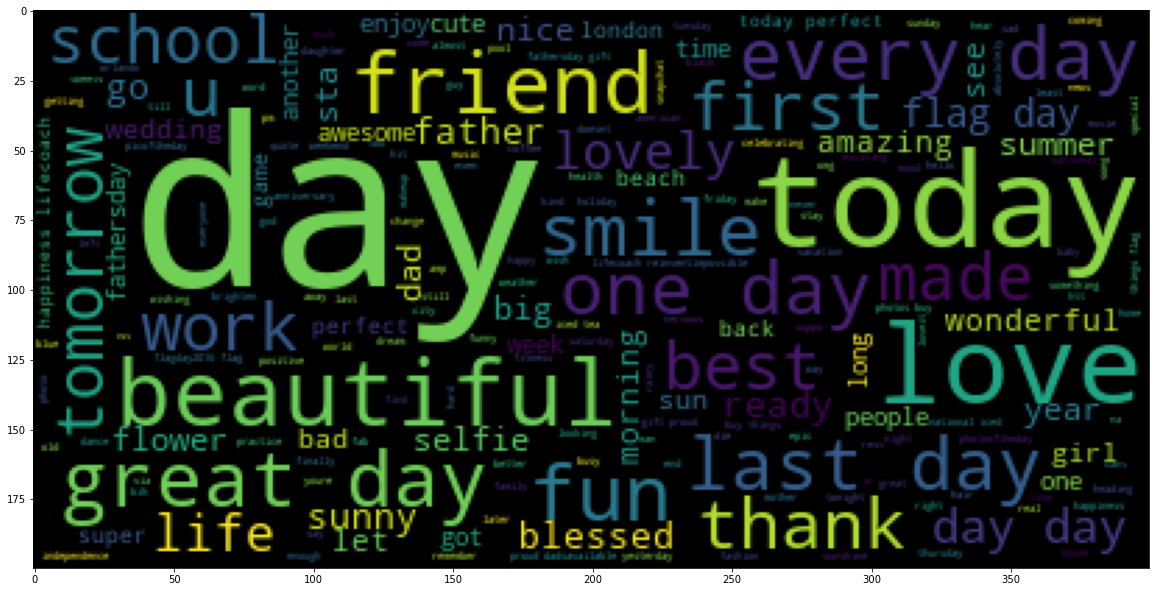

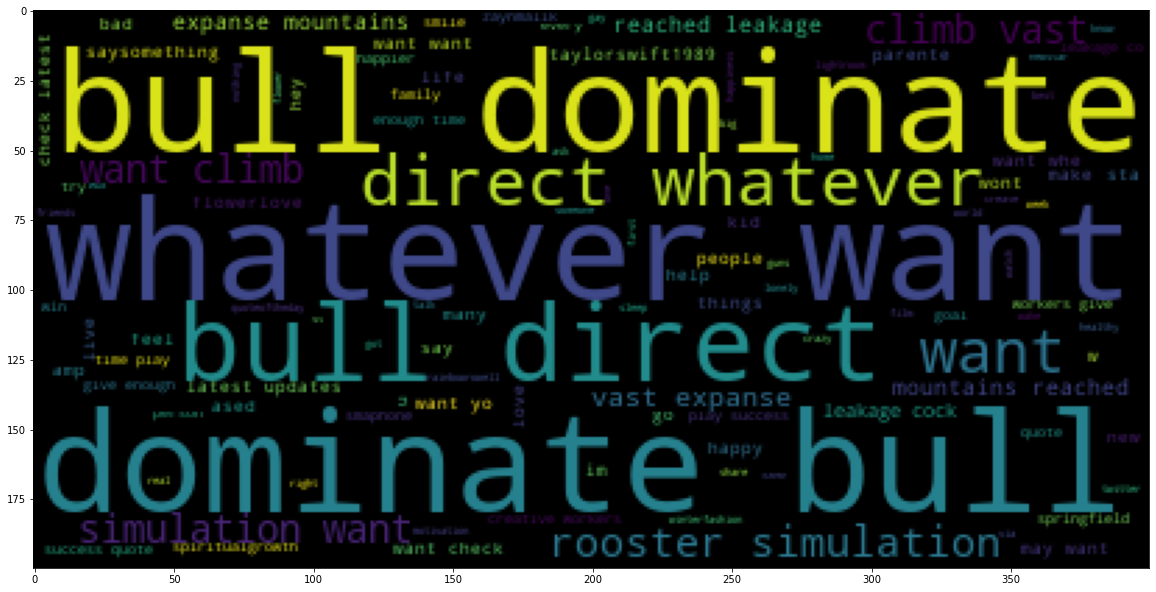

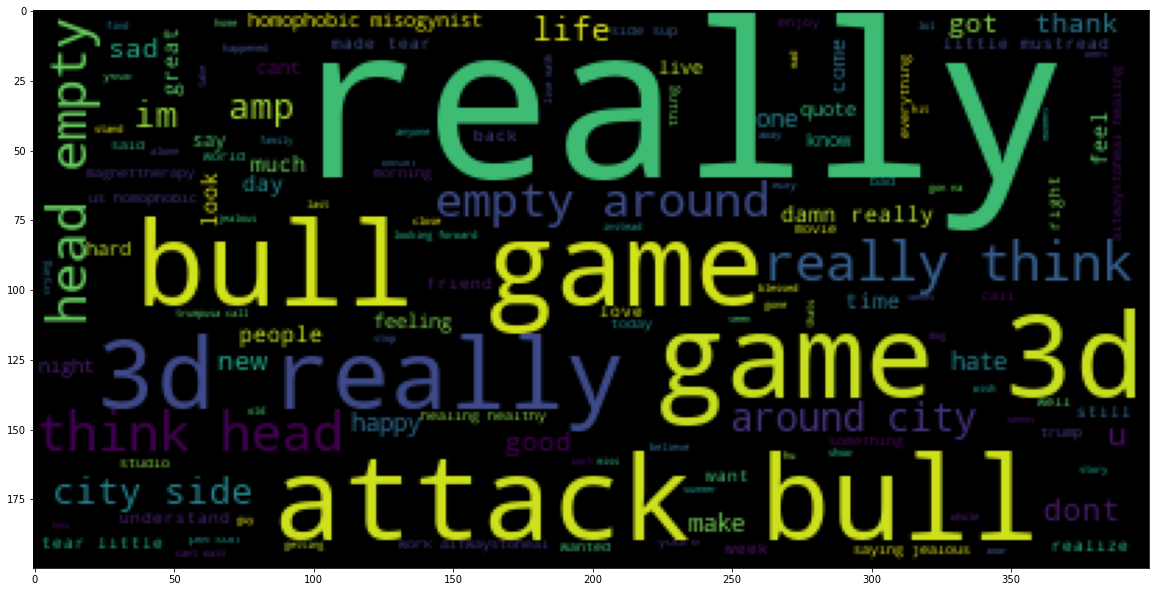

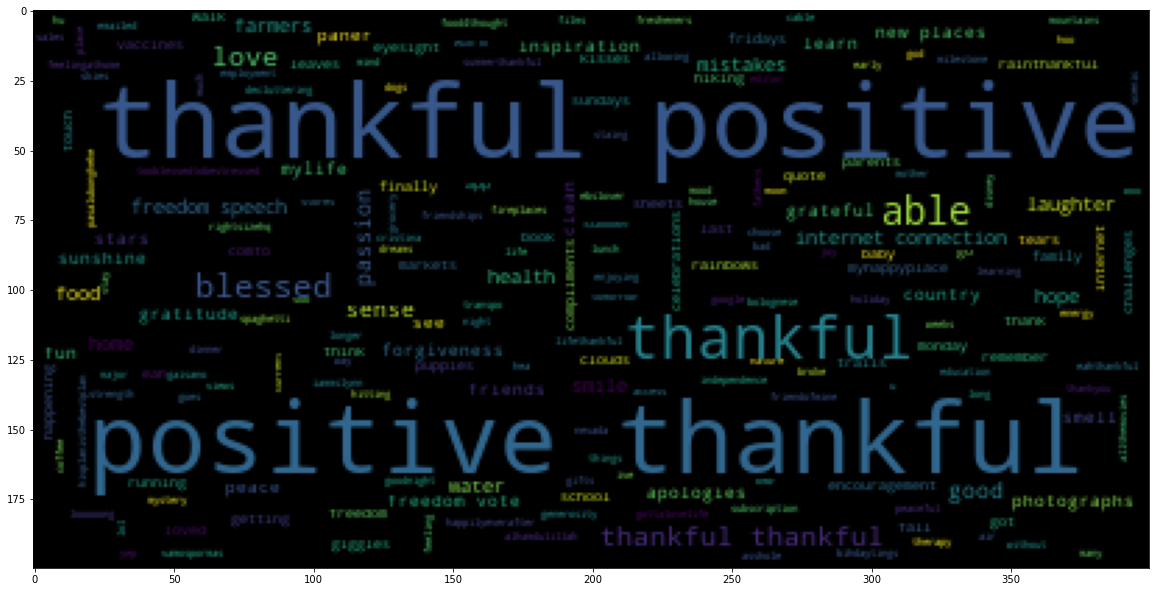

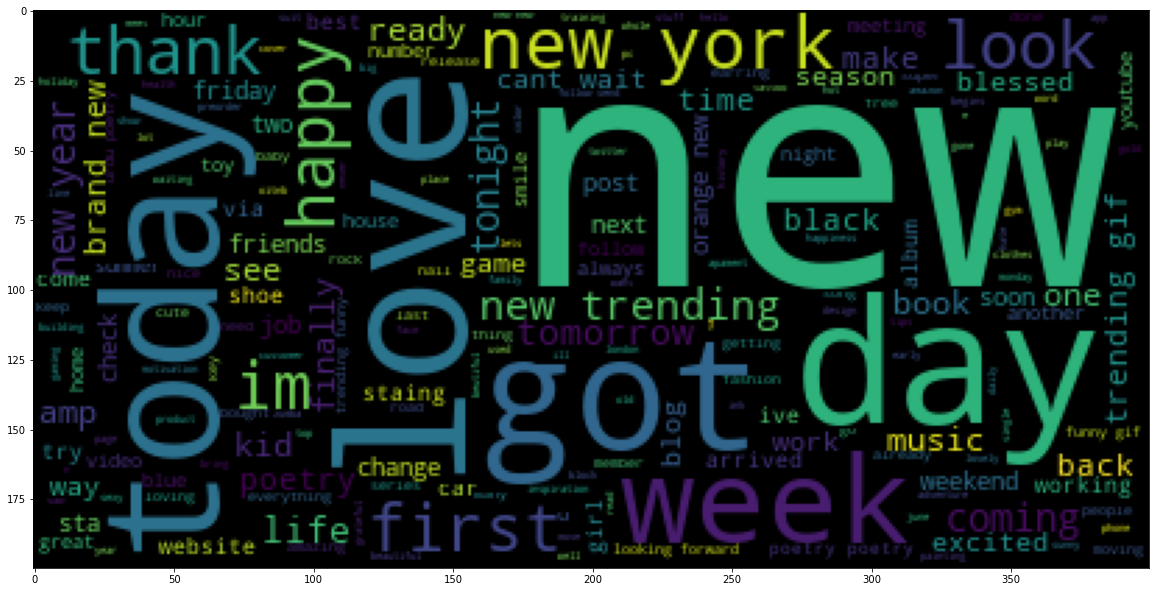

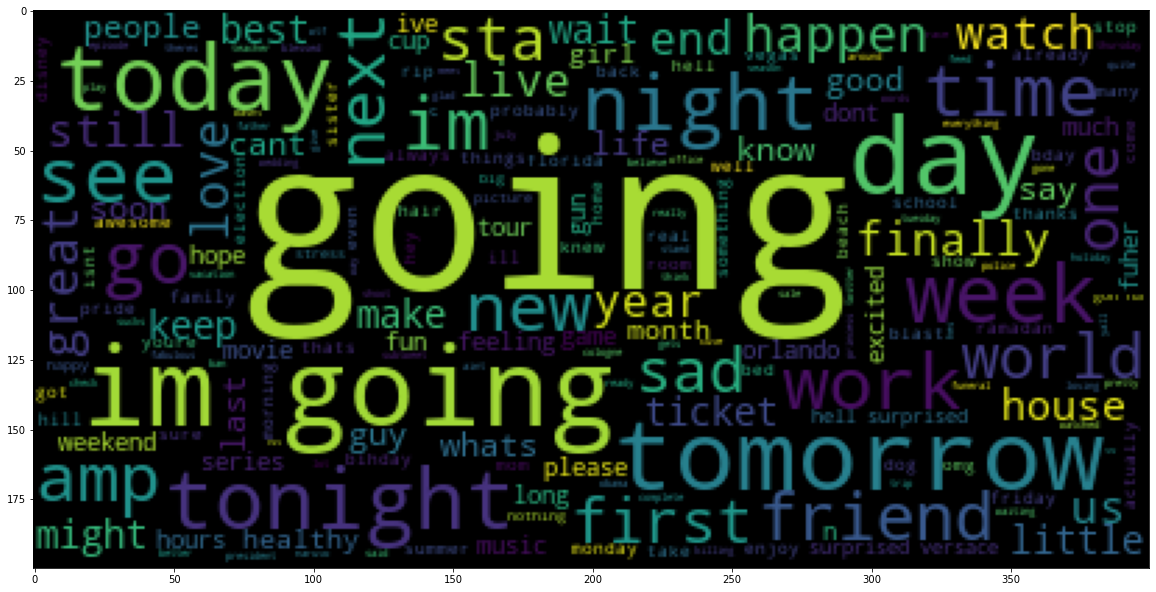

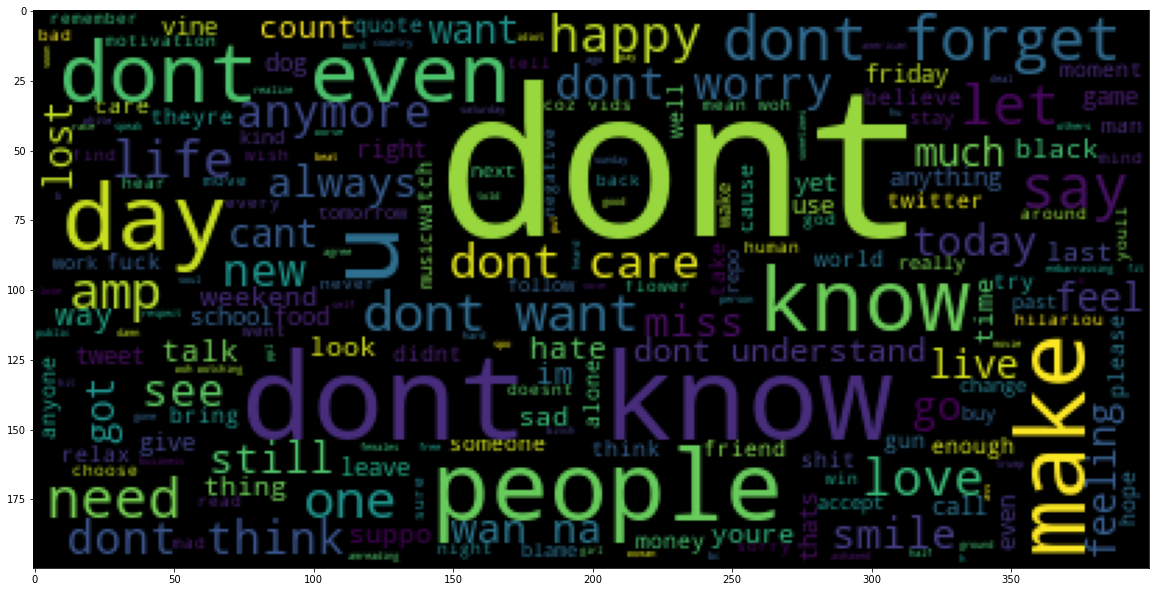

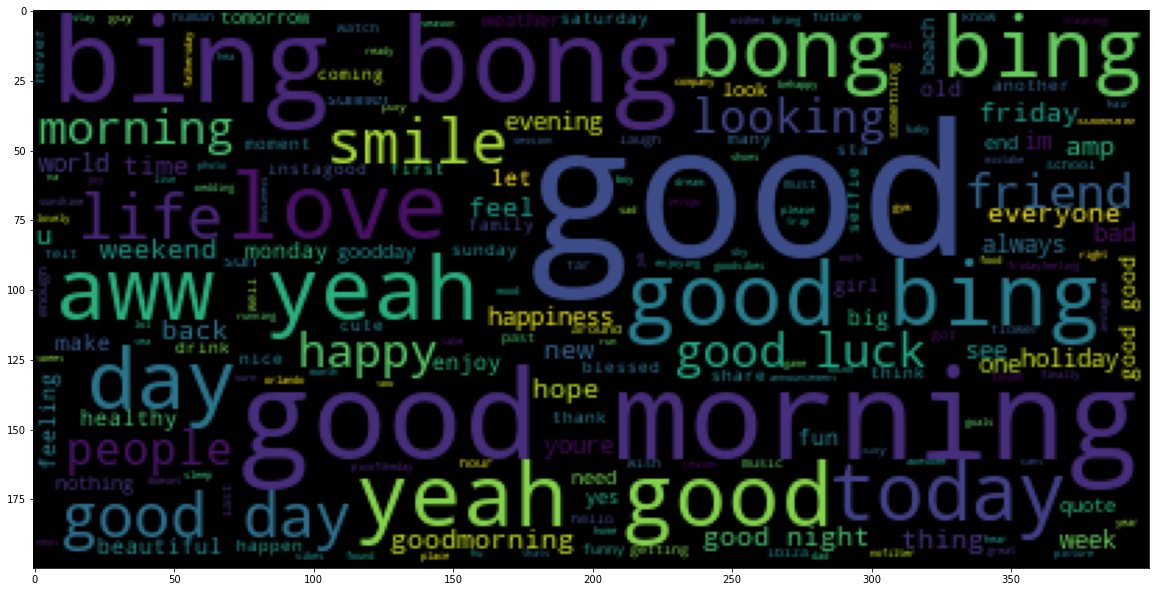

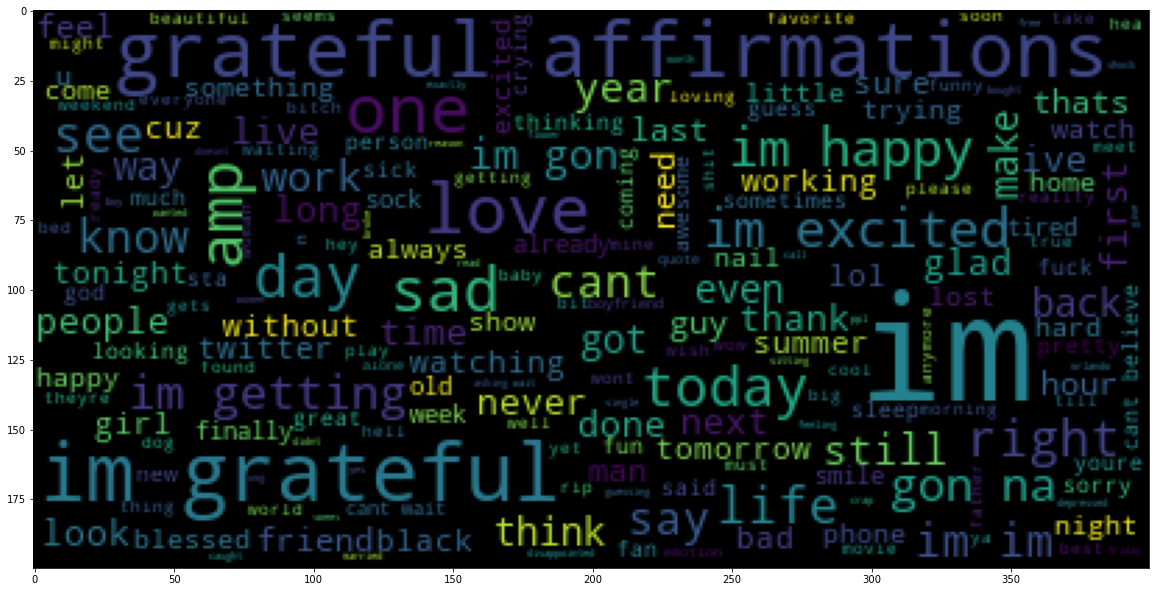

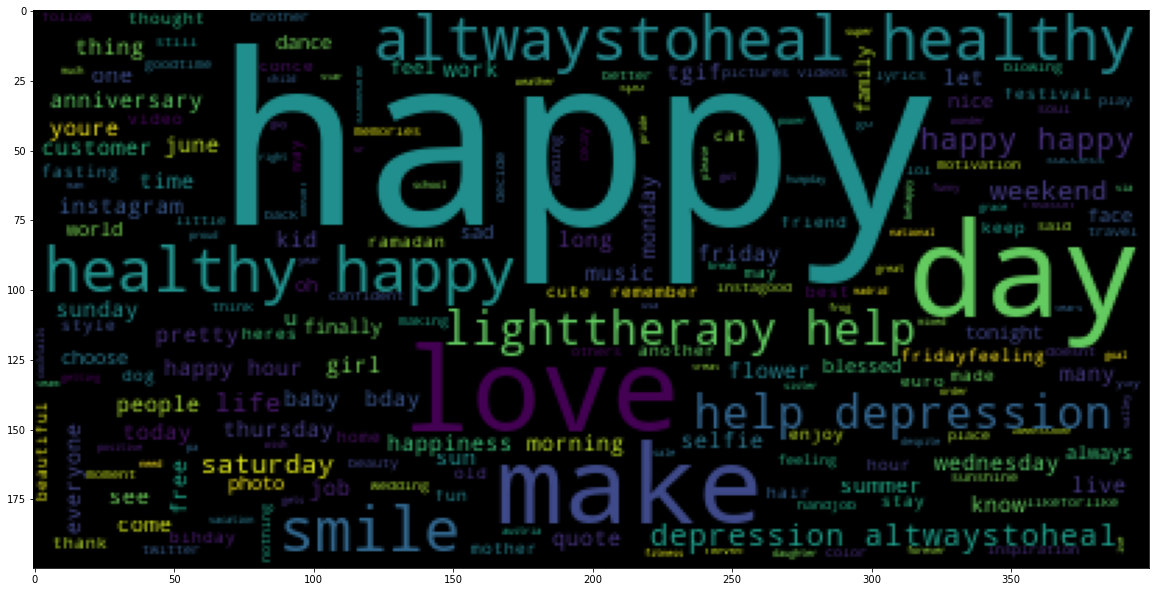

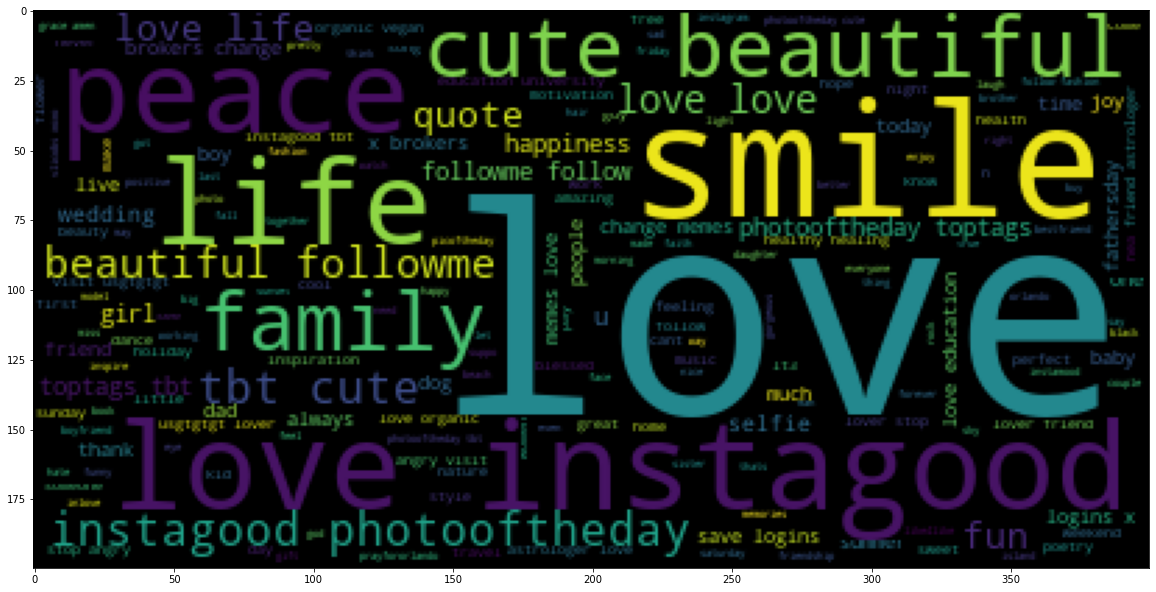

In [260]:
cluster(df_c,'tweet_modificado','clusters')

In [265]:
# A partir da visualização das nuvens foram agrupados clusters similares com o objetivo de reduzir a quantidade de números de clusters
df_c['clusters'].loc[df_c['clusters'] == 0] = 'pensamentos_positivos'
df_c['clusters'].loc[df_c['clusters'] == 4] = 'pensamentos_positivos'
df_c['clusters'].loc[df_c['clusters'] == 7] = 'pensamentos_positivos'
df_c['clusters'].loc[df_c['clusters'] == 11] = 'pensamentos_positivos'
df_c['clusters'].loc[df_c['clusters'] == 12] = 'pensamentos_positivos'
df_c['clusters'].loc[df_c['clusters'] == 15] = 'pensamentos_positivos'
df_c['clusters'].loc[df_c['clusters'] == 1] = 'familia'
df_c['clusters'].loc[df_c['clusters'] == 2] = 'familia'
df_c['clusters'].loc[df_c['clusters'] == 3] = 'familia'
df_c['clusters'].loc[df_c['clusters'] == 5] = 'esporte'
df_c['clusters'].loc[df_c['clusters'] == 6] = 'negativo'
df_c['clusters'].loc[df_c['clusters'] == 9] = 'expectativa'
df_c['clusters'].loc[df_c['clusters'] == 10] = 'duvida'
df_c['clusters'].loc[df_c['clusters'] == 13] = 'gratidao'
df_c['clusters'].loc[df_c['clusters'] == 14] = 'depressao'
df_c['clusters'].loc[df_c['clusters'] == 'depressao']

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


41       depressao
80       depressao
84       depressao
103      depressao
116      depressao
           ...    
17127    depressao
17160    depressao
17173    depressao
17174    depressao
17175    depressao
Name: clusters, Length: 845, dtype: object

In [267]:
# Criando uma nova coluna e aplicando uma função com as condicionais em relação a outra coluna com o objetivo de 
# corresponder valores textuais em valores númericos exemplo pensamentos positivios será igual a 0
df_c['clusters_num'] = df_c['clusters'].apply(lambda x: 0 if x == 'pensamentos_positivos' else (1 if x == 'familia' 
                                                                                                else 2 if x == 'esporte' 
                                                                                                else 3 if x == 'negativo' 
                                                                                                else 4 if x == 'expectativa' 
                                                                                                else 5 if x == 'duvida' 
                                                                                                else 6 if x == 'gratidao' 
                                                                                                else 7))

### Conjunto de Treino e Teste

In [268]:
# Instanciando 
X = fitar

y = df_c[['clusters_num']]

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train.values

array([[7],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

### Modelo de Àrvore de decisão

In [270]:
clf = DecisionTreeClassifier(random_state=0, criterion = 'gini', splitter = 'best',max_depth = None,min_samples_split = 200,
                            max_features = 'sqrt')  

In [271]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_features='sqrt', min_samples_split=200,
                       random_state=0)

In [272]:
predictions = clf.predict(X_test)

### Métricas de Avaliação do modelo

In [273]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[ 449   21    2    0    8    0    1    7]
 [   8 2364    0    0    2    0    1   14]
 [   1    0   46    0    0    0    1    0]
 [   0    0    0   52    2    1    1    3]
 [   3    2    0    0   32    0    0    0]
 [   0    0    0    0    0   63    0    0]
 [   1    1    0    0    0    0   99    1]
 [   0    2    0    0    0    1    0  251]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       488
           1       0.99      0.99      0.99      2389
           2       0.96      0.96      0.96        48
           3       1.00      0.88      0.94        59
           4       0.73      0.86      0.79        37
           5       0.97      1.00      0.98        63
           6       0.96      0.97      0.97       102
           7       0.91      0.99      0.95       254

    accuracy                           0.98      3440
   macro avg       0.94      0.95      0.94      3440
weighted avg       0.98      0.98      0.98      3440

0.97

### Modelo de RandomForest

In [274]:
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0, max_depth = None,min_samples_split = 200,
                            max_features = 'sqrt')  
text_classifier.fit(X_train, y_train)
predictions_rf = text_classifier.predict(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [275]:
predictions_rf = text_classifier.predict(X_test)

### Métricas de avaliação do Modelo - RandomForest

In [276]:
print(confusion_matrix(y_test,predictions_rf))  
print(classification_report(y_test,predictions_rf))  
print(accuracy_score(y_test, predictions_rf))

[[ 481    4    0    0    0    1    0    2]
 [   2 2382    0    0    0    0    0    5]
 [   1    0   47    0    0    0    0    0]
 [   0    0    0   55    0    2    1    1]
 [   0    0    0    0   37    0    0    0]
 [   0    0    0    0    0   63    0    0]
 [   0    1    0    0    0    0   99    2]
 [   1    2    0    0    0    1    0  250]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       488
           1       1.00      1.00      1.00      2389
           2       1.00      0.98      0.99        48
           3       1.00      0.93      0.96        59
           4       1.00      1.00      1.00        37
           5       0.94      1.00      0.97        63
           6       0.99      0.97      0.98       102
           7       0.96      0.98      0.97       254

    accuracy                           0.99      3440
   macro avg       0.99      0.98      0.98      3440
weighted avg       0.99      0.99      0.99      3440

0.99

### Cross-Validation para RandomForest

In [277]:

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0, max_depth = None,min_samples_split = 200,
                            max_features = 'sqrt')   

y_pred = cross_val_predict(clf, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

In [278]:
scores = cross_validate(text_classifier, X, y, cv= 5,scoring=('r2', 'neg_mean_squared_error','f1_macro','recall_macro','precision_macro'),return_train_score=True)
scores

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

{'fit_time': array([1.97927022, 2.11973166, 2.04210591, 2.02143097, 2.09020209]),
 'score_time': array([0.08407426, 0.09001994, 0.08593583, 0.08424854, 0.08916497]),
 'test_r2': array([0.94274267, 0.95337613, 0.96385198, 0.96057996, 0.95990926]),
 'train_r2': array([0.97815658, 0.97987243, 0.97783345, 0.97958497, 0.97757619]),
 'test_neg_mean_squared_error': array([-0.21395349, -0.17412791, -0.13492294, -0.1471358 , -0.14975284]),
 'train_neg_mean_squared_error': array([-0.08155848, -0.07516174, -0.0827882 , -0.07624655, -0.0837331 ]),
 'test_f1_macro': array([0.97037298, 0.9798027 , 0.97037173, 0.98470022, 0.9766471 ]),
 'train_f1_macro': array([0.98599712, 0.98380904, 0.98814241, 0.98342899, 0.98772475]),
 'test_recall_macro': array([0.96750212, 0.97258388, 0.96858251, 0.9857512 , 0.97170374]),
 'train_recall_macro': array([0.98099052, 0.9780938 , 0.98654012, 0.98008377, 0.98510127]),
 'test_precision_macro': array([0.97510216, 0.98785896, 0.97339845, 0.98403207, 0.98241643]),
 'trai